In [1]:
import numpy as np
import time

In [10]:
import matplotlib.pyplot as plt

In [2]:
#Author: tzot at https://stackoverflow.com/a/3796442
import itertools as it
def erat3( ):
    D = { 9: 3, 25: 5 }
    yield 2
    yield 3
    yield 5
    MASK= 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
    MODULOS= frozenset( (1, 7, 11, 13, 17, 19, 23, 29) )

    for q in it.compress(
            it.islice(it.count(7), 0, None, 2),
            it.cycle(MASK)):
        p = D.pop(q, None)
        if p is None:
            D[q*q] = q
            yield q
        else:
            x = q + 2*p
            while x in D or (x%30) not in MODULOS:
                x += 2*p
            D[x] = p

In [3]:
def f(lims):
    p_prev_1, p_prev_diff = 2, 0
    n=0 # count primes
    i=0 #count prime rows
    lim = lims.pop()
    for p in erat3():
        if p-p_prev_1<=p_prev_diff:
            i+=1
            p_prev_diff = 0
            p_prev_1 = p
            #print()
            if p > lim:
                break
        n+=1
        #print(p, end=' ')
        p_prev_diff = p-p_prev_1
        p_prev_1 = p
    if len(lims) == 0:
        return n/i
    else: 
        yield n/i

In [4]:
min=2
max = 9
lims = np.logspace(min,max,3*(max-min)+1).tolist()
lims.reverse()

In [5]:
lims

[1000000000.0,
 464158883.3612773,
 215443469.00318778,
 100000000.0,
 46415888.33612773,
 21544346.900318824,
 10000000.0,
 4641588.833612773,
 2154434.6900318824,
 1000000.0,
 464158.8833612772,
 215443.46900318822,
 100000.0,
 46415.888336127726,
 21544.346900318822,
 10000.0,
 4641.588833612777,
 2154.4346900318824,
 1000.0,
 464.15888336127773,
 215.44346900318845,
 100.0]

In [6]:
convergence = []

In [7]:
while len(lims):
    print('N', int(lims[-1]))
    t = time.process_time()
    try:
        res=next(f(lims))
    except StopIteration as e:
        res=e.value
        
    convergence += [res]
    print('limit',res)
    print('t', time.process_time() - t)

N 100
limit 2.5
t 0.00023548600000000697
N 215
limit 2.473684210526316
t 0.00012123199999991563
N 464
limit 2.6285714285714286
t 0.0002944930000001733
N 1000
limit 2.6
t 0.0002926919999999278
N 2154
limit 2.6422764227642275
t 0.0006579760000000601
N 4641
limit 2.706896551724138
t 0.001121064000000116
N 10000
limit 2.6623376623376624
t 0.0024291510000000738
N 21544
limit 2.6455142231947484
t 0.00613034400000001
N 46415
limit 2.6655555555555557
t 0.028770485000000123
N 100000
limit 2.6675006950236306
t 0.03171026399999999
N 215443
limit 2.667221067221067
t 0.06128152599999992
N 464158
limit 2.665887368493433
t 0.13068371699999992
N 1000000
limit 2.662280404259649
t 0.2983479849999999
N 2154434
limit 2.6621062466631074
t 0.6495108510000001
N 4641588
limit 2.664192250653426
t 1.5559665999999996
N 10000000
limit 2.666387154755982
t 2.802610565
N 21544346
limit 2.668117395426091
t 6.3820319439999995
N 46415888
limit 2.670825432060827
t 13.007959411999998
N 100000000
limit 2.673222605112082
t

In [16]:
lims = np.logspace(min,max,3*(max-min)+1).tolist()

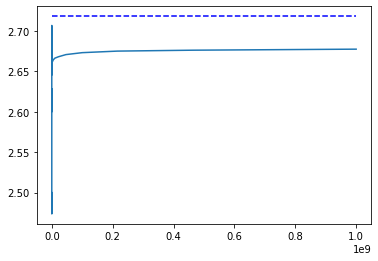

In [21]:
plt.plot(lims, convergence)
plt.hlines(np.e,lims[0],lims[-1],'blue','dashed')

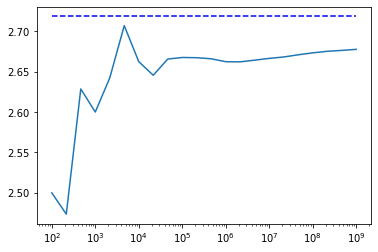

In [22]:
plt.semilogx(lims, convergence)
plt.hlines(np.e,lims[0],lims[-1],'blue','dashed')

In [8]:
convergence

[2.5,
 2.473684210526316,
 2.6285714285714286,
 2.6,
 2.6422764227642275,
 2.706896551724138,
 2.6623376623376624,
 2.6455142231947484,
 2.6655555555555557,
 2.6675006950236306,
 2.667221067221067,
 2.665887368493433,
 2.662280404259649,
 2.6621062466631074,
 2.664192250653426,
 2.666387154755982,
 2.668117395426091,
 2.670825432060827,
 2.673222605112082,
 2.6751431605473344,
 2.676274042728076,
 2.6775492070252396]

In [9]:
lims

[]